In [5]:
import numpy as np
import pandas as pd
import mlflow
import warnings
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sys, os

In [6]:
# sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [7]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [32]:
from file_handler import FileHandler
from train import Train

In [66]:
file_handler = FileHandler()
merged = file_handler.read_csv("../features/merged_features.csv")

In [24]:
df = file_handler.read_csv('data/train.csv.dvc', 'v2')


### Random Forest Regressor 

In [29]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=15,
                                verbose=True,
                                max_depth=15,
                                min_samples_split=2,
                                min_samples_leaf=1)
train_model = Train(model, "Random Forest Regressor")

train_model.train_sales()
train_model.train_customers()

2022/05/30 12:04:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '14570f66b1444026a466bb9d11d0b85d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   10.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.0s finished
2022/05/30 12:04:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bd4aa3a154ba48adb1c8f7a22543f5fa', which

In [69]:
# Making a new data set for model building
trainS=merged[['Store', 'DayOfWeek','Promo',
       'StateHoliday', 'SchoolHoliday','StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month']]
trainS.shape

(35093, 15)

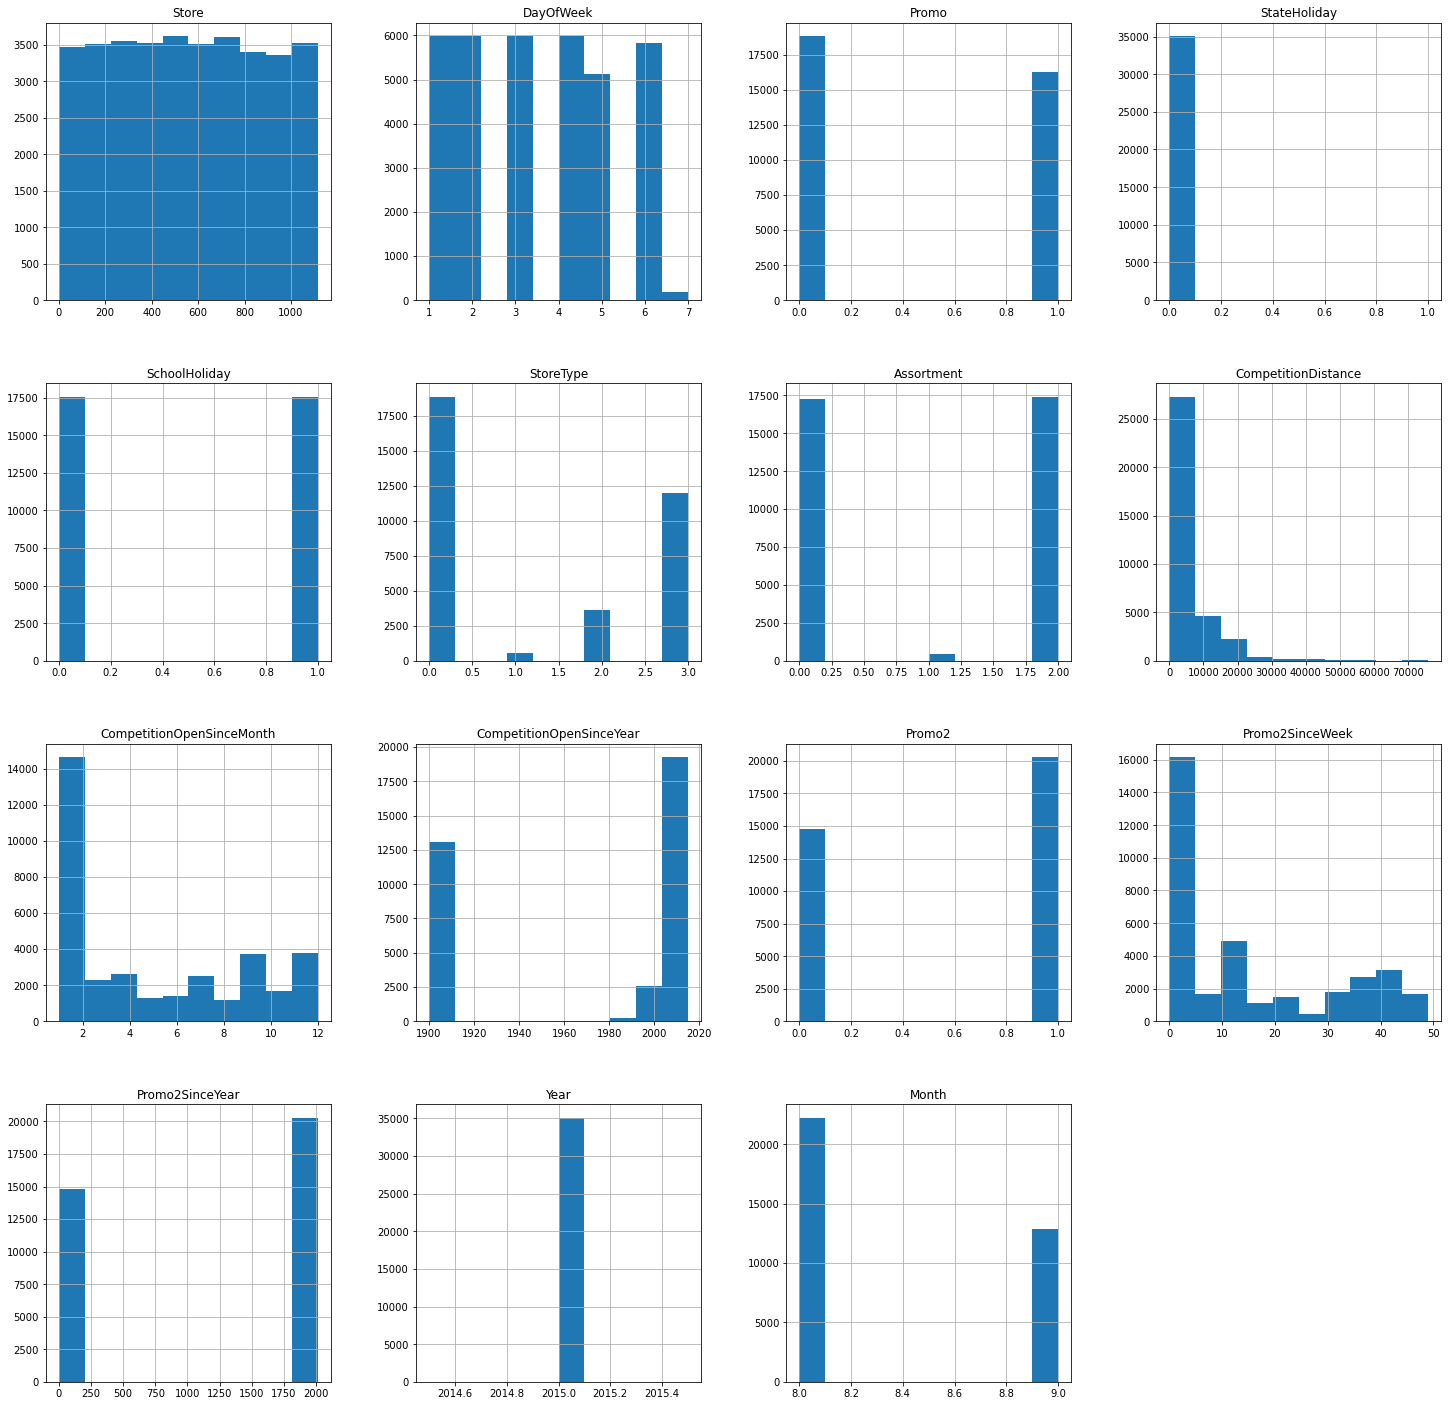

In [70]:
# Visualization to chech whether the data is distributed normally
trainS.hist(figsize=(25,25))
plt.show()

In [72]:
model = RandomForestRegressor(n_estimators=15,
                          criterion='mse',
                          max_features='sqrt',
                          oob_score=True,
                          n_jobs=32,
                          verbose=1,
                          random_state=101)

model.fit(X_train, y_train)

2022/05/31 00:25:24 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '75acff0610ad404c93144b5d21821b8a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


ValueError: could not convert string to float: 'a'